<a href="https://colab.research.google.com/github/9Y7H/py-13/blob/master/wk10_py_data_science_II_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python data science: pandas & graphics wokout

## Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### [1] Make data, Series, and DataFrame
=>행렬구조의 데이터 DataFrame, 벡터구조의 데이터 Series

### Series

In [66]:
# Creating a Series by passing a list of values #데이터의 한 계열
s = pd.Series([1,3,5,np.nan,6,8]) 
# np.nan 숫자가 아닌 다른 것, 숫자가 아니라도 에러가 나지 않고 빼고 계산한다.
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [67]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [68]:
 # Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
#randn 평균이 0(?,index=dates 날짜를 인덱스로 사용
df

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-04,-0.475458,0.841730,-1.821381,0.058715
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-06,-0.347017,-0.793589,0.905843,1.089211


In [69]:
# check types of df  --> same type
df.dtypes #데이터 타입: 64바이트 실수의 형태

A    float64
B    float64
C    float64
D    float64
dtype: object

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),#문자열
                    'F' : 'foo' })#문자

In [71]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [72]:
# check types of df2 --> different types
df2.dtypes #df와의 차이점은 데이터 타입
#pandas의 데이터 타입은 여러가지 데이터 타입을 담을 수 있는 효율적인 것

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### [2] Handling data

In [73]:
# head()
df.head(2) #처음 데이터 2개

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-02,-0.544799,0.655444,0.712425,0.863576


In [74]:
 df.tail(3) #마지막 데이터 3개

,A,B,C,D
2013-01-04,-0.475458,0.841730,-1.821381,0.058715
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-06,-0.347017,-0.793589,0.905843,1.089211


In [75]:
# Display the index, columns, and the underlying NumPy data:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [76]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [77]:
# describe() shows a quick statistic summary of your data:
df.describe() #각 열의 데이터 분포(평균, 표준편차, ...)를 요약해 보여줌
#mean은 대부분 0부근이지만 6개밖에 안되는 데이터라서 아직 0의 값에 근접하지 못했다.

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.103599,-0.364987,-0.171562,0.704063
std,0.529639,0.879260,1.072314,1.078328
min,-0.544799,-1.210004,-1.821381,-0.425397
25%,-0.443348,-0.896122,-0.829429,0.056624
50%,-0.323678,-0.773395,0.117377,0.461146
75%,0.088202,0.303283,0.626675,1.032802
max,0.828306,0.841730,0.905843,2.582344


In [78]:
df2.describe() #6개의 항목 중 왜 3개만? 숫자형 항목이 A,C,D 밖에 없기 때문이다

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [79]:
#행과 열을 바꿔주는 T # Transposing your dataframe:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.828306,-0.544799,0.217715,-0.475458,-0.300339,-0.347017
B,-1.210004,0.655444,-0.753202,0.841730,-0.930300,-0.793589
C,-1.061015,0.712425,-0.134670,-1.821381,0.369425,0.905843
D,0.055927,0.863576,2.582344,0.058715,-0.425397,1.089211


#### Sorting

In [80]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=False)
#axis=0 행 기준(알파벳 순), 아래로 내려갈 수록 옛날

,A,B,C,D
2013-01-06,-0.347017,-0.793589,0.905843,1.089211
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-04,-0.475458,0.841730,-1.821381,0.058715
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-01,0.828306,-1.210004,-1.061015,0.055927


In [81]:
df.sort_index(axis=1, ascending=False)
#axis=1은 열 기준(날짜 순) #아래가 최근

,D,C,B,A
2013-01-01,0.055927,-1.061015,-1.210004,0.828306
2013-01-02,0.863576,0.712425,0.655444,-0.544799
2013-01-03,2.582344,-0.134670,-0.753202,0.217715
2013-01-04,0.058715,-1.821381,0.841730,-0.475458
2013-01-05,-0.425397,0.369425,-0.930300,-0.300339
2013-01-06,1.089211,0.905843,-0.793589,-0.347017


In [82]:
# Sorting by values:
df.sort_values(by='B')#, ascending=False) # False를 하면 큰 값이 제일 먼저
#B 데이터의 큰 값이 젤 밑에오게 정렬

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-06,-0.347017,-0.793589,0.905843,1.089211
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-04,-0.475458,0.841730,-1.821381,0.058715


In [83]:
df.sort_values(by = 'C')  #by 가 C열을 기준으로 정렬하는 것

,A,B,C,D
2013-01-04,-0.475458,0.841730,-1.821381,0.058715
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-06,-0.347017,-0.793589,0.905843,1.089211


#### Selecting data by indexing and slicing

> **at, iat, loc, iloc**

=>at~에  iat~에 대한 인덱션
i는 모두 인덱션을 뜻함

In [84]:
# Selecting a single column, which yields a Series
df['A']

2013-01-01    0.828306
2013-01-02   -0.544799
2013-01-03    0.217715
2013-01-04   -0.475458
2013-01-05   -0.300339
2013-01-06   -0.347017
Freq: D, Name: A, dtype: float64

In [85]:
# Selecting via [], which slices the rows.
df[0:4] #행인덱스 0부터 3까지

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-04,-0.475458,0.841730,-1.821381,0.058715


In [86]:
df['20130102':'20130104'] # 인덱스가 아닌 값인 경우는 지전된 범위가 다 선택된다.
#지정된 값은 마지막까지 포함됨

,A,B,C,D
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-04,-0.475458,0.841730,-1.821381,0.058715


#### Selecting data by label

In [87]:
df#랜덤의 값이기 때문에 다다름

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-04,-0.475458,0.841730,-1.821381,0.058715
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-06,-0.347017,-0.793589,0.905843,1.089211


In [88]:
df.loc[dates[0]]   # loc()
#열 0번째 데이터 인덱스에 포함되는 값 가져오기
#Series로 보여짐

A    0.828306
B   -1.210004
C   -1.061015
D    0.055927
Name: 2013-01-01 00:00:00, dtype: float64

In [89]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']] #데이터 베이스 인덱스는 모두 []

,A,B
2013-01-01,0.828306,-1.210004
2013-01-02,-0.544799,0.655444
2013-01-03,0.217715,-0.753202
2013-01-04,-0.475458,0.841730
2013-01-05,-0.300339,-0.930300
2013-01-06,-0.347017,-0.793589


#### [도전코딩]

> Select data for first two days AND comumn 3,4 from df.

=> 시험(사지선다형)

In [90]:
#df.loc[0:3,['C','D']] #인덱스 번호를 바로 넣으면 실행되지 않음
df.loc['20130101':'20130102',['C','D']]
#df.loc[dates[:2],['C','D']] 
#pandas에서 부분 데이터를 불어오려면 loc 함수를 사용 
#loc 안에 인덱스 번호가 아닌 값이 들어가야함

,C,D
2013-01-01,-1.061015,0.055927
2013-01-02,0.712425,0.863576


In [91]:
df.loc[dates[:2],['C','D']] 

,C,D
2013-01-01,-1.061015,0.055927
2013-01-02,0.712425,0.863576


#### Selecting data by position  (iloc())

In [92]:
df

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-04,-0.475458,0.841730,-1.821381,0.058715
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-06,-0.347017,-0.793589,0.905843,1.089211


=> df.iloc[행 인덱스, 열 인덱스]의 형태를 만족해야한다.

=> 값을 슬라이싱(문자열 범위 지정), 리스트의 형태로도 사용 가능

In [93]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨. #1월 4일의 데이터가 나옴

A   -0.475458
B    0.841730
C   -1.821381
D    0.058715
Name: 2013-01-04 00:00:00, dtype: float64

In [94]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
df.iloc[:2,2:4]

,C,D
2013-01-01,-1.061015,0.055927
2013-01-02,0.712425,0.863576


In [95]:
# Select one item
df.iloc[1,1]

0.655444204462161

#### Selecting data by Boolean indexing

In [96]:
df

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-02,-0.544799,0.655444,0.712425,0.863576
2013-01-03,0.217715,-0.753202,-0.134670,2.582344
2013-01-04,-0.475458,0.841730,-1.821381,0.058715
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397
2013-01-06,-0.347017,-0.793589,0.905843,1.089211


In [97]:
df[df.A > 0] #A의 값이 0보다 큰 데이터

,A,B,C,D
2013-01-01,0.828306,-1.210004,-1.061015,0.055927
2013-01-03,0.217715,-0.753202,-0.134670,2.582344


In [98]:
df[df > 0] #값이 0보다 작으면 NaN or Na로 나타남

,A,B,C,D
2013-01-01,0.828306,NaN,NaN,0.055927
2013-01-02,NaN,0.655444,0.712425,0.863576
2013-01-03,0.217715,NaN,NaN,2.582344
2013-01-04,NaN,0.841730,NaN,0.058715
2013-01-05,NaN,NaN,0.369425,NaN
2013-01-06,NaN,NaN,0.905843,1.089211


### Setting (데이터 재구성 또는 확장)

In [99]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
df['F'] = s1 #열 추가하고 값을 s1에서 가져옴

In [101]:
df  # 기존 df의 구조에 맞춰서 재구성됨.

,A,B,C,D,F
2013-01-01,0.828306,-1.210004,-1.061015,0.055927,NaN
2013-01-02,-0.544799,0.655444,0.712425,0.863576,1.0
2013-01-03,0.217715,-0.753202,-0.134670,2.582344,2.0
2013-01-04,-0.475458,0.841730,-1.821381,0.058715,3.0
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397,4.0
2013-01-06,-0.347017,-0.793589,0.905843,1.089211,5.0


In [102]:
# Setting values by label:
df.at[dates[0],'A'] = 0 #특정한 값 변경
df

,A,B,C,D,F
2013-01-01,0.000000,-1.210004,-1.061015,0.055927,NaN
2013-01-02,-0.544799,0.655444,0.712425,0.863576,1.0
2013-01-03,0.217715,-0.753202,-0.134670,2.582344,2.0
2013-01-04,-0.475458,0.841730,-1.821381,0.058715,3.0
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397,4.0
2013-01-06,-0.347017,-0.793589,0.905843,1.089211,5.0


In [103]:
# Setting values by position (index):
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.061015,0.055927,NaN
2013-01-02,-0.544799,0.655444,0.712425,0.863576,1.0
2013-01-03,0.217715,-0.753202,-0.134670,2.582344,2.0
2013-01-04,-0.475458,0.841730,-1.821381,0.058715,3.0
2013-01-05,-0.300339,-0.930300,0.369425,-0.425397,4.0
2013-01-06,-0.347017,-0.793589,0.905843,1.089211,5.0


In [106]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
#[5] 5라는 숫자 len(df) = 6 번 출력
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.061015,5,NaN
2013-01-02,-0.544799,0.655444,0.712425,5,1.0
2013-01-03,0.217715,-0.753202,-0.134670,5,2.0
2013-01-04,-0.475458,0.841730,-1.821381,5,3.0
2013-01-05,-0.300339,-0.930300,0.369425,5,4.0
2013-01-06,-0.347017,-0.793589,0.905843,5,5.0


In [107]:
[5]*len(df)

[5, 5, 5, 5, 5, 5]

### Missing data

- pandas primarily uses the value np.nan to represent missing data. 

In [111]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
#reindex => index 재설정하기
df1 #E의 값을 할당하지 않아서 값이 없다고 나타나는 것임

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.061015,5,NaN,NaN
2013-01-02,-0.544799,0.655444,0.712425,5,1.0,NaN
2013-01-03,0.217715,-0.753202,-0.134670,5,2.0,NaN
2013-01-04,-0.475458,0.841730,-1.821381,5,3.0,NaN


In [112]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1 #E 열의 첫째날 둘째날 값을 1로 넣는다

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.061015,5,NaN,1.0
2013-01-02,-0.544799,0.655444,0.712425,5,1.0,1.0
2013-01-03,0.217715,-0.753202,-0.134670,5,2.0,NaN
2013-01-04,-0.475458,0.841730,-1.821381,5,3.0,NaN


In [113]:
# To drop any rows that have missing data.
df1.dropna(how='any') #숫자가 아닌 것들은 모두 없애라

,A,B,C,D,F,E
2013-01-02,-0.544799,0.655444,0.712425,5,1.0,1.0


In [114]:
# Filling missing data.
df1.fillna(value=5) #값이 없는 NaN에 5라는 값으로 대체

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.061015,5,5.0,1.0
2013-01-02,-0.544799,0.655444,0.712425,5,1.0,1.0
2013-01-03,0.217715,-0.753202,-0.134670,5,2.0,5.0
2013-01-04,-0.475458,0.841730,-1.821381,5,3.0,5.0


In [116]:
# Get the boolean mask where values are nan.
pd.isna(df1) #누락된 값 감지

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

In [117]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.061015,5,NaN
2013-01-02,-0.544799,0.655444,0.712425,5,1.0
2013-01-03,0.217715,-0.753202,-0.134670,5,2.0
2013-01-04,-0.475458,0.841730,-1.821381,5,3.0
2013-01-05,-0.300339,-0.930300,0.369425,5,4.0
2013-01-06,-0.347017,-0.793589,0.905843,5,5.0


In [118]:
df.mean() #열의 평균을 얻을 수 있다.

A   -0.241650
B   -0.163319
C   -0.171562
D    5.000000
F    3.000000
dtype: float64

In [119]:
df.mean(0)

A   -0.241650
B   -0.163319
C   -0.171562
D    5.000000
F    3.000000
dtype: float64

In [120]:
df.mean(1) #가로로 평균

2013-01-01    0.984746
2013-01-02    1.364614
2013-01-03    1.265969
2013-01-04    1.308978
2013-01-05    1.627757
2013-01-06    1.953047
Freq: D, dtype: float64

***

# Chapter 12-03
## matplotlib을 사용한다

### plot( )로 그래프를 그린다

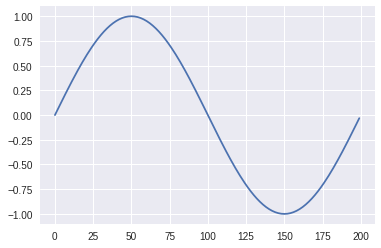

In [121]:
# sin그래프를 그린다
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01)) #np.pi 원주율(?
t = plt.plot(s)    # sin의 그래프를 그림 
# x축이 데이터 인덱스

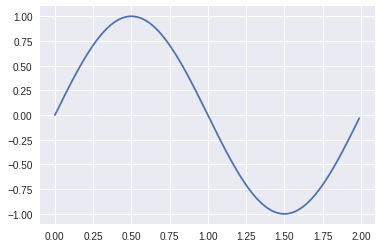

In [122]:
plt.plot(np.arange(0.0, 2.0, 0.01),s)

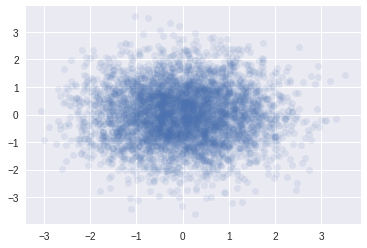

In [123]:
# 산포도(scatter plot)를 그린다
# 인수 마커를 사용하여 산포도를 작성
x = np.random.randn(5000)    # 표준 정규 분포에 따라 난수 생성
y = np.random.randn(5000)
t = plt.plot(x, y, 'o', alpha=0.1)
#점의 모양 o

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


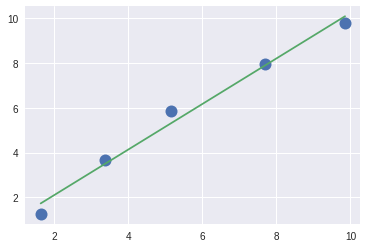

In [124]:
# 그래프를 중복해 그림
x = np.array([1.628, 3.363, 5.145, 7.683, 9.855])
y = np.array([1.257, 3.672, 5.841, 7.951, 9.775])
# 최소 자승법(least square method)으로 데이터를 근사하는 직선을 구함
a = np.array([x, np.ones(x.size)])
a = a.T
m, c = np.linalg.lstsq(a, y)[0]
t = plt.plot(x, y, 'o', ms=12)   # 데이터를 그림
t = plt.plot(x, (m*x+c))  # 근사직선을 그림, m:기울기,c:bias(절편)

### plot( )로 그림을 제어

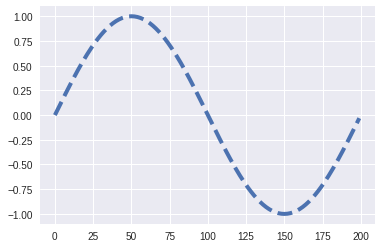

In [125]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=4) #스타일, 두께

### 문자를 삽입한다

In [0]:
# 표시용 폰트 지정
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'

In [0]:
# 시스템에서 사용 가능한 글꼴 목록을 표시
import matplotlib.font_manager as fm
fontsfamily = fm.findSystemFonts()

In [128]:
fontsfamily[:5]

['/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf']

***

# Chapter 12-04
## 일본 인구를 시각화한다

### 인구 데이터를 읽어 들임

In [129]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
# 1944년부터 2014년까지의 5계층 단계별로 인구를 남녀별로 읽어 들임
import numpy as np

p_male = np.loadtxt('male_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))
p_female = np.loadtxt('female_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))

In [131]:
# 계급별과 연도별로 인구를 계산한다.
# 남녀 5세씩의 단계별로 인구를 합계
p_total = p_male+p_female
print(p_total)
# 연도별 인구로 수정
p_yearly = p_total.sum(axis=1)
p_yearly #년도별 총 인구 수

[[8712. 8803. 8684. ...    0.    0.    0.]
 [9251. 8581. 8645. ...    0.    0.    0.]
 [7858. 8734. 8692. ...    0.    0.    0.]
 ...
 [5272. 5407. 5868. ... 1146.  331.   51.]
 [5239. 5361. 5790. ... 1215.  343.   55.]
 [5213. 5307. 5713. ... 1305.  352.   60.]]


array([ 73063.,  71999.,  73115.,  78101.,  80003.,  81771.,  83199.,
        84571.,  85854.,  87034.,  88294.,  89277.,  90258.,  91086.,
        92010.,  92971.,  93420.,  94285.,  95179.,  96157.,  97187.,
        98275.,  99054., 100244., 101410., 102649., 103719., 105013.,
       107334., 108709., 110050., 111940., 113086., 114153., 115174.,
       116131., 117061., 117879., 118693., 119485., 120237., 121046.,
       121672., 122264., 122784., 123254., 123611., 124044., 124452.,
       124765., 125033., 125568., 125865., 126169., 126485., 126685.,
       126923., 127289., 127433., 127618., 127687., 127766., 127769.,
       127767., 127690., 127509., 128057., 127799., 127513., 127295.,
       127082.])

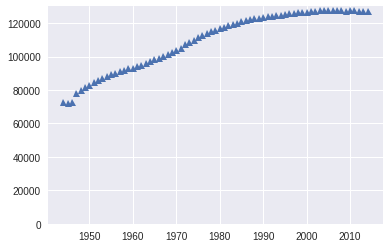

In [132]:
# 연도별 인구를 그래프화 한다
%matplotlib inline
import matplotlib.pyplot as plt

t = plt.plot(range(1944, 2015), p_yearly, '^')
plt.ylim((0, 130000)) #y축의 범위
plt.grid(True) #격자

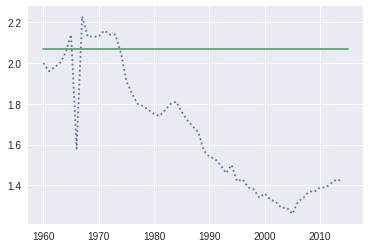

In [133]:
# 출생률(합계 특수 출생률) 그래프를 그린다
# 1960년에서 2014년을 읽어 들임
tfr = np.loadtxt('total_fertility_rate.csv', delimiter=",", skiprows=1) #한 줄을 빼고 가져옴
# 출산율 그래프를 그린다
t = plt.plot(range(1960, 2015), tfr, ls=":")
# 인구 치환 경계선을 2.07로 하여 선을 그림
t = plt.plot([1960, 2015], [2.07, 2.07])
#출생률이 라인보다 낮으면 출생률이 낮다는 것을 표현

### 인구 피라미드를 그린다

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3)
    ax[0].set(ylim=(0, 100), xlim=(0, 6000)) # 0부터 100세까지
    ax[0].invert_xaxis() #x축을 반대로 돌리기
    ax[0].yaxis.tick_right() #y 눈금은 오른쪽에 표시
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off') #남자의  y그래프를 공유하기 때문에 표시 X
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])
    
    #show_pgraph 그래프를 나누어 그려줌

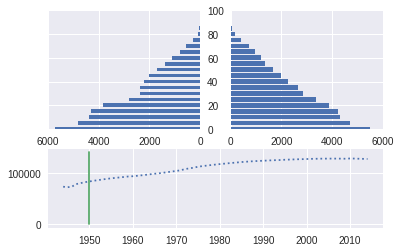

In [135]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(1950, p_male, p_female, p_yearly,
            1944, 2014)

> year를 변경해서 그래프를 그려보시오.

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3)
    ax[0].set(ylim=(0, 100), xlim=(0, 6000)) # 0부터 100세까지
    ax[0].invert_xaxis() #x축을 반대로 돌리기
    ax[0].yaxis.tick_right() #y 눈금은 오른쪽에 표시
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off') #남자의  y그래프를 공유하기 때문에 표시 X
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])
    
    #show_pgraph 그래프를 나누어 그려줌

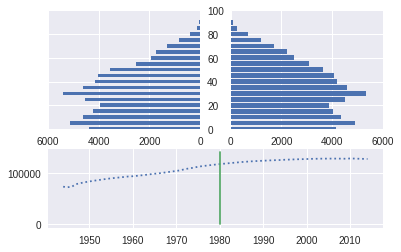

In [137]:
show_pgraph(1980, p_male, p_female, p_yearly,
            1944, 2014) #1980년의 데이터를 가져옴

***

## 특강안내

### VR 응용과 전망 (HC 관련 내용 포함)

### 11월8일(목) 4시~6시, 신어관 101호 강당

***

### [wk10] homework

#### 다음 파이썬 노트북 [tips_reshape](https://github.com/Redwoods/Py/blob/master/py-basic/tips/Tips_py_reshape.ipynb) 을 colab에서 실행하고 설명을 추가해서 github에 올리시오.(마감: 2018.11.11(일). 24:00)

> 제출 파일명: Summary_reshape.ipynb

***
https://github.com/Redwoods/Py/blob/master/py-basic/tips/digits100.csv 다운로드해서 업로딩하는 것
이해한 걸 써서 올리기